In [6]:
import pandas as pd


In [7]:
# Load dataset
df = pd.read_csv("customer_feedback_satisfaction.csv")

In [8]:
# View basic info
print(df.head(5))

   CustomerID  Age  Gender Country  Income  ProductQuality  ServiceQuality  \
0           1   56    Male      UK   83094               5               8   
1           2   69    Male      UK   86860              10               2   
2           3   46  Female     USA   60173               8              10   
3           4   32  Female      UK   73884               7              10   
4           5   60    Male      UK   97546               6               4   

   PurchaseFrequency FeedbackScore LoyaltyLevel  SatisfactionScore  
0                  5           Low       Bronze              100.0  
1                  8        Medium         Gold              100.0  
2                 18        Medium       Silver              100.0  
3                 16           Low         Gold              100.0  
4                 13           Low       Bronze               82.0  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB
None


In [10]:
print(df.describe())


         CustomerID           Age         Income  ProductQuality  \
count  38444.000000  38444.000000   38444.000000    38444.000000   
mean   19222.500000     43.496853   75076.619238        5.494746   
std    11097.971211     14.972748   25975.752966        2.873192   
min        1.000000     18.000000   30001.000000        1.000000   
25%     9611.750000     31.000000   52624.500000        3.000000   
50%    19222.500000     43.000000   75236.000000        5.000000   
75%    28833.250000     56.000000   97606.750000        8.000000   
max    38444.000000     69.000000  119999.000000       10.000000   

       ServiceQuality  PurchaseFrequency  SatisfactionScore  
count    38444.000000       38444.000000       38444.000000  
mean         5.492769          10.453881          85.276409  
std          2.875812           5.765621          16.898577  
min          1.000000           1.000000           4.280000  
25%          3.000000           5.000000          74.470000  
50%          5.

In [11]:
print(df['FeedbackScore'].value_counts())

FeedbackScore
High      12918
Low       12784
Medium    12742
Name: count, dtype: int64


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Country', 'FeedbackScore', 'LoyaltyLevel'], drop_first=True)

In [14]:
# 2. Scale numerical features (optional but recommended)
scaler = MinMaxScaler()
numerical_cols = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [15]:
print(df_encoded[['Age','Income']].head())

        Age    Income
0  0.745098  0.589935
1  1.000000  0.631781
2  0.549020  0.335252
3  0.274510  0.487600
4  0.823529  0.750517


In [16]:
# 3. Separate features and target
X = df_encoded.drop(['CustomerID', 'SatisfactionScore'], axis=1)
y = df_encoded['SatisfactionScore']

In [17]:
# Quick check
print(X.head())
print(y.head())

        Age    Income  ProductQuality  ServiceQuality  PurchaseFrequency  \
0  0.745098  0.589935        0.444444        0.777778           0.210526   
1  1.000000  0.631781        1.000000        0.111111           0.368421   
2  0.549020  0.335252        0.777778        1.000000           0.894737   
3  0.274510  0.487600        0.666667        1.000000           0.789474   
4  0.823529  0.750517        0.555556        0.333333           0.631579   

   Gender_Male  Country_France  Country_Germany  Country_UK  Country_USA  \
0         True           False            False        True        False   
1         True           False            False        True        False   
2        False           False            False       False         True   
3        False           False            False        True        False   
4         True           False            False        True        False   

   FeedbackScore_Low  FeedbackScore_Medium  LoyaltyLevel_Gold  \
0               True 

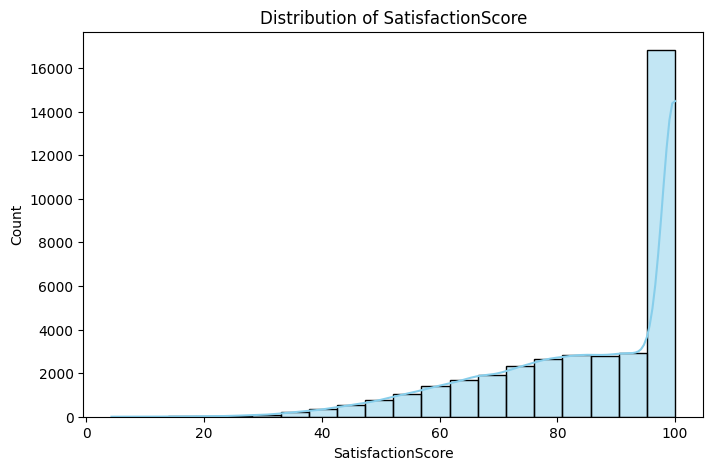

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['SatisfactionScore'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of SatisfactionScore")
plt.xlabel("SatisfactionScore")
plt.ylabel("Count")
plt.show()

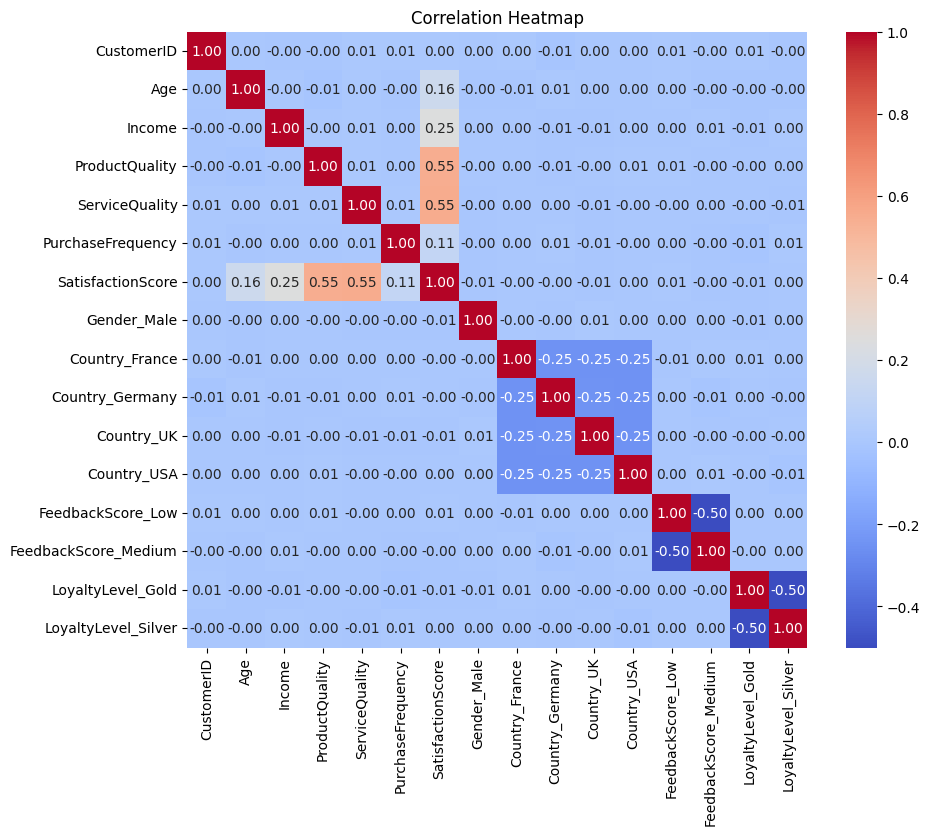

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


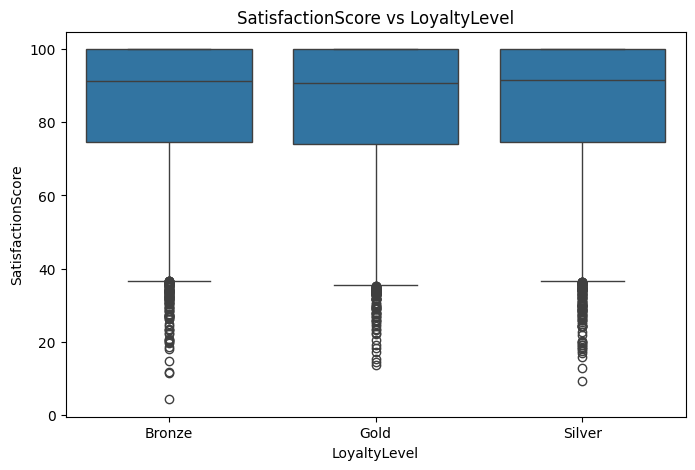

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LoyaltyLevel', y='SatisfactionScore', data=df)
plt.title("SatisfactionScore vs LoyaltyLevel")
plt.show()


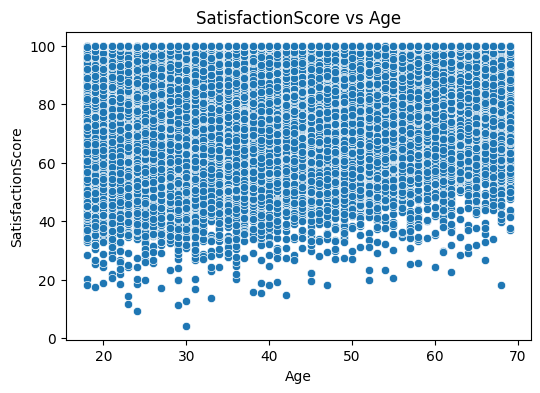

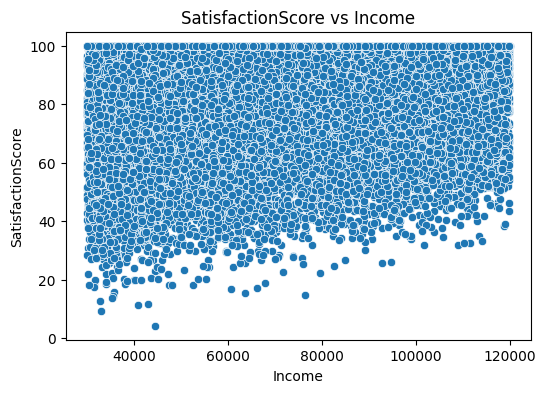

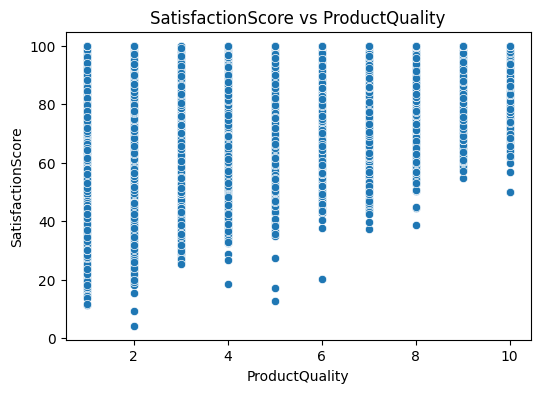

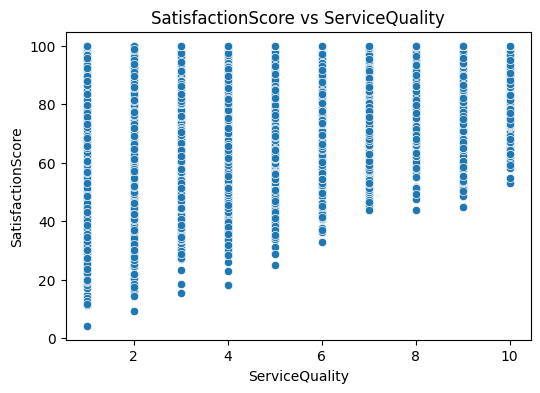

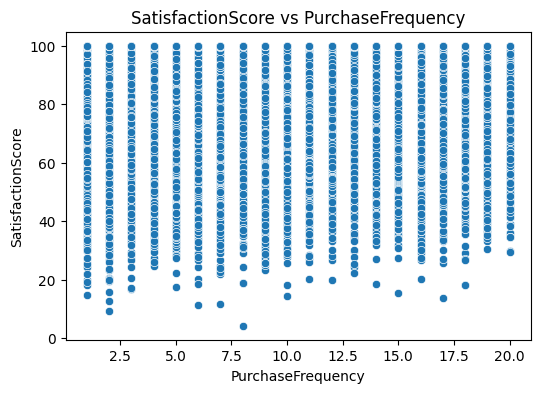

In [21]:
numerical_cols = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['SatisfactionScore'])
    plt.title(f"SatisfactionScore vs {col}")
    plt.show()

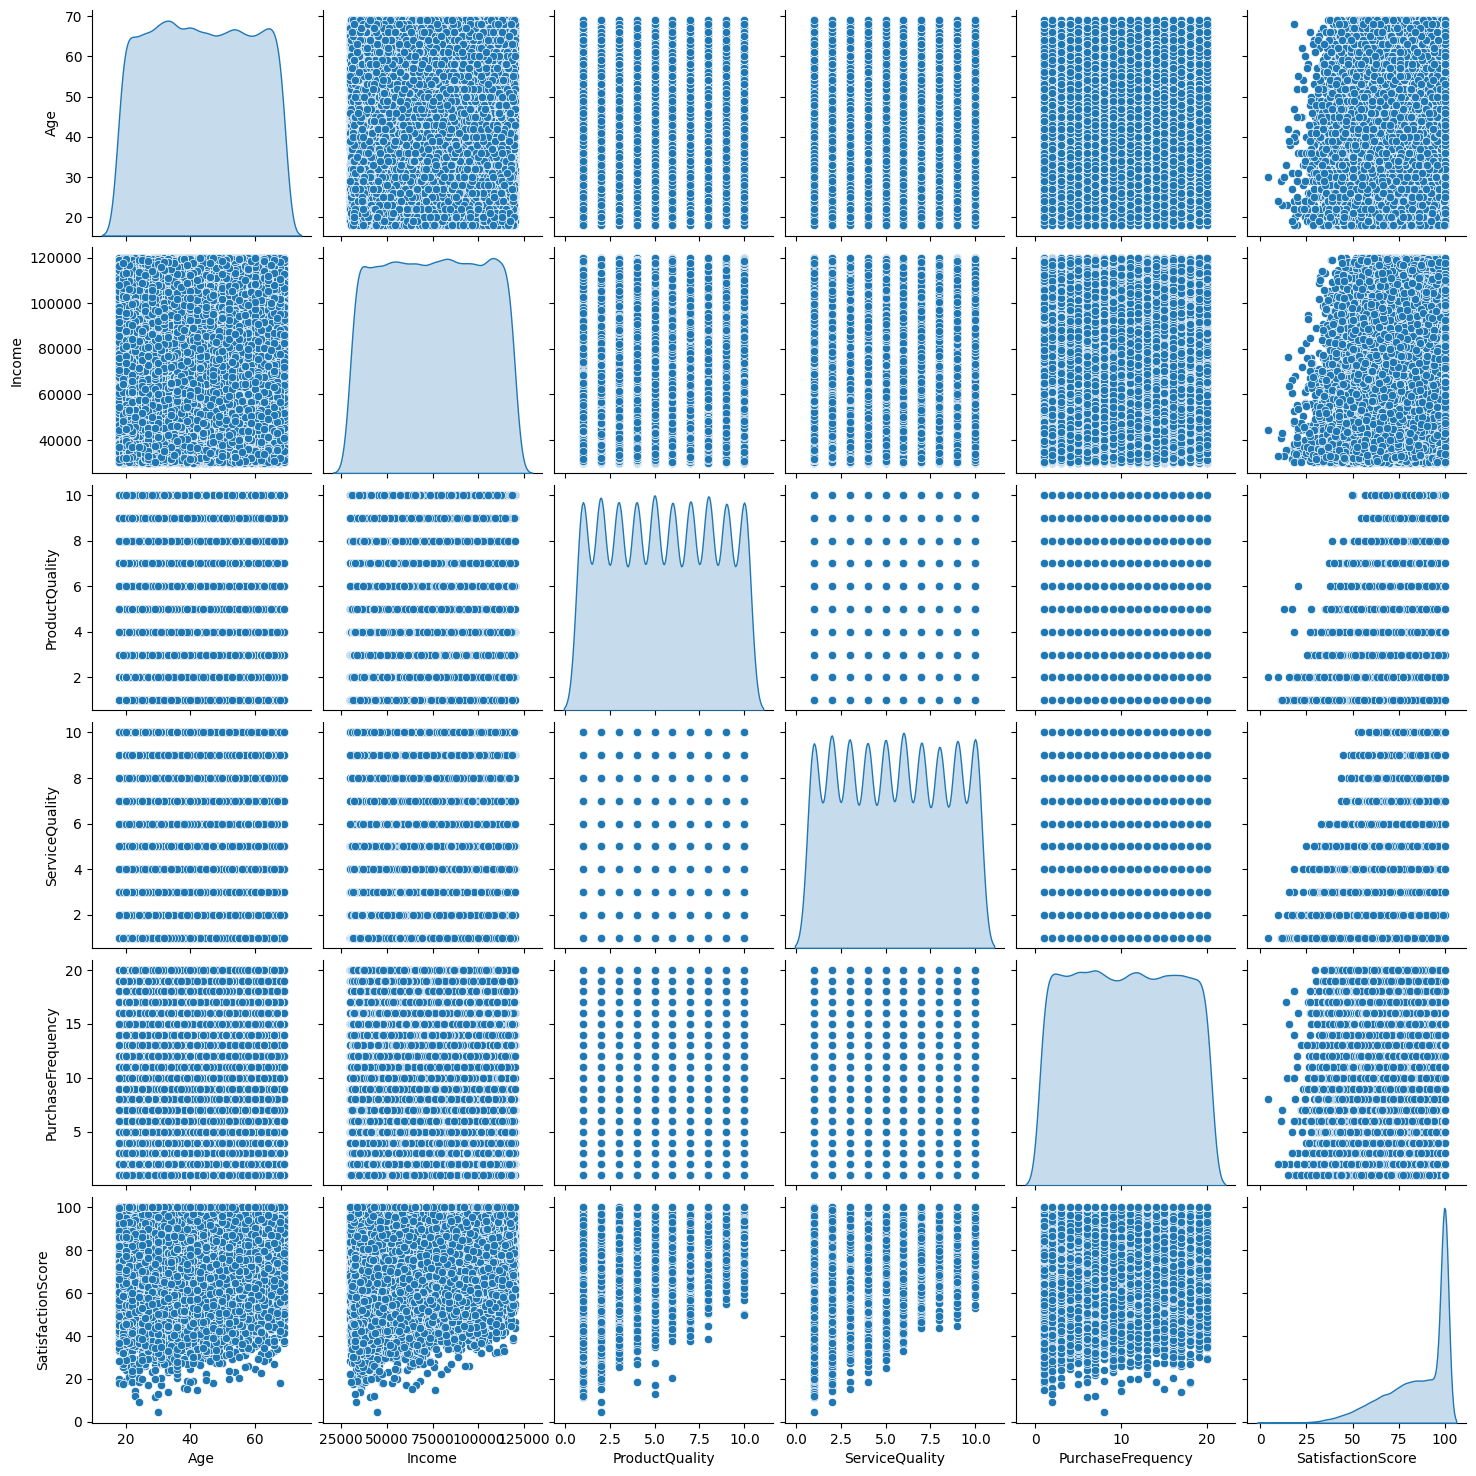

In [22]:
sns.pairplot(df[numerical_cols + ['SatisfactionScore']], diag_kind='kde')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

RMSE: 8.07
R2 Score: 0.77


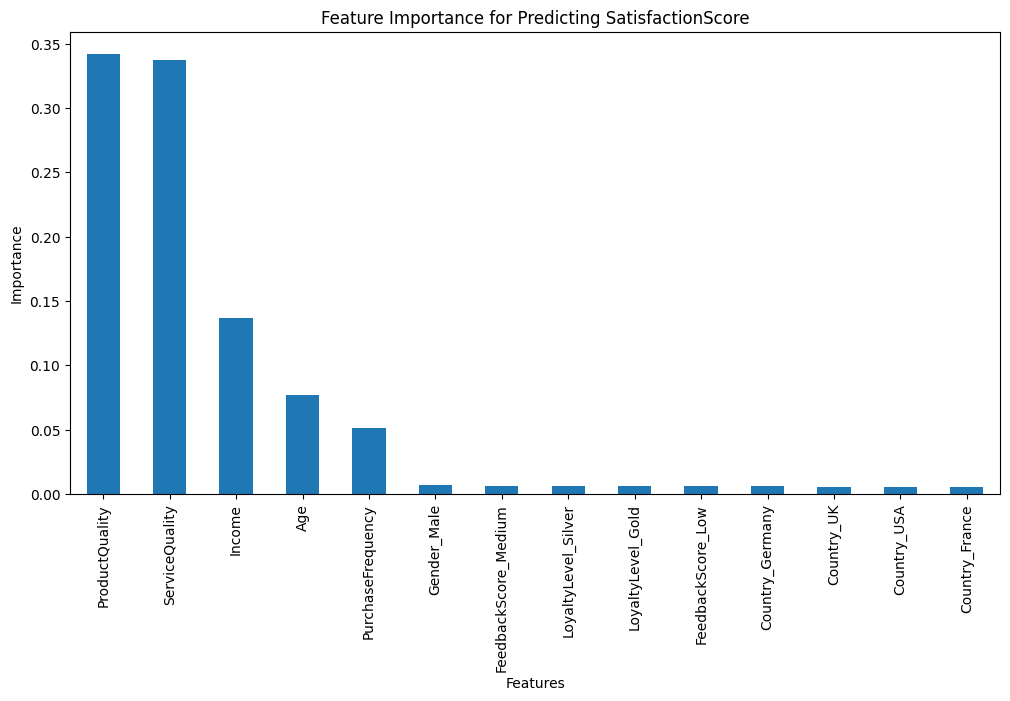

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the trained Random Forest model
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance for Predicting SatisfactionScore")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [29]:
top_features = importances.sort_values(ascending=False).head(5)
print("Top 5 features influencing SatisfactionScore:")
print(top_features)

Top 5 features influencing SatisfactionScore:
ProductQuality       0.341994
ServiceQuality       0.337155
Income               0.136907
Age                  0.077153
PurchaseFrequency    0.051365
dtype: float64


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 8.07


In [31]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.77


In [32]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


MAE: 5.68


RMSE: 8.07
MAE: 5.68
R² Score: 0.77


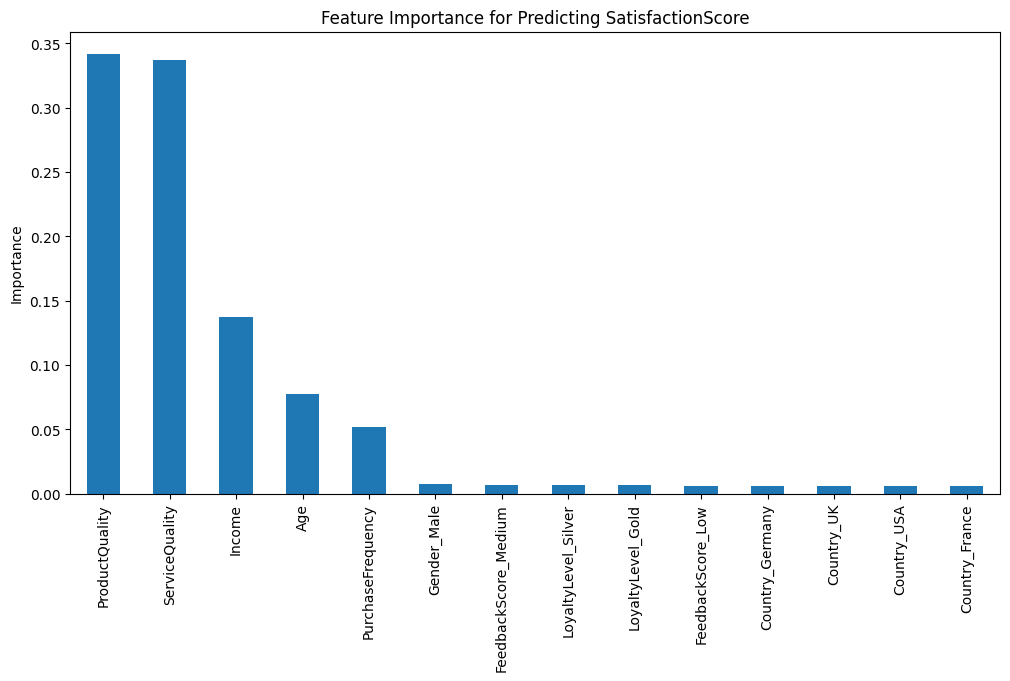

In [33]:
# ---- Import Libraries ----
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ---- Load Dataset ----
df = pd.read_csv("customer_feedback_satisfaction.csv")

# ---- Preprocessing ----
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Country', 'FeedbackScore', 'LoyaltyLevel'], drop_first=True)

# Scale numerical features
numerical_cols = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Separate features and target
X = df_encoded.drop(['CustomerID', 'SatisfactionScore'], axis=1)
y = df_encoded['SatisfactionScore']

# ---- Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Train Random Forest Regressor ----
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---- Make Predictions ----
y_pred = model.predict(X_test)

# ---- Evaluate Model ----
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# ---- Feature Importance ----
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
importances.plot(kind='bar')
plt.title("Feature Importance for Predicting SatisfactionScore")
plt.ylabel("Importance")
plt.show()


In [34]:
import pandas as pd

# Example new customer data
new_customer = pd.DataFrame({
    'Age': [35],
    'Income': [60000],
    'ProductQuality': [7],
    'ServiceQuality': [8],
    'PurchaseFrequency': [10],
    'Gender_Male': [1],  # Male=1, Female=0
    'Country_UK': [0],
    'Country_USA': [1],
    'Country_Canada': [0],
    'Country_Germany': [0],
    'Country_France': [0],
    'FeedbackScore_Medium': [1],
    'FeedbackScore_High': [0],
    'LoyaltyLevel_Silver': [0],
    'LoyaltyLevel_Gold': [1]
})


In [35]:
# Use the same scaler used during training
numerical_cols = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']
new_customer[numerical_cols] = scaler.transform(new_customer[numerical_cols])


In [37]:
# Example new customer as raw data
new_customer_raw = pd.DataFrame({
    'Age': [35],
    'Income': [60000],
    'ProductQuality': [7],
    'ServiceQuality': [8],
    'PurchaseFrequency': [10],
    'Gender': ['Male'],
    'Country': ['USA'],
    'FeedbackScore': ['Medium'],
    'LoyaltyLevel': ['Gold']
})

# Apply same encoding
new_customer_encoded = pd.get_dummies(
    new_customer_raw,
    columns=['Gender','Country','FeedbackScore','LoyaltyLevel'],
    drop_first=True
)

# Align to training columns (add missing columns with 0)
new_customer_encoded = new_customer_encoded.reindex(columns=X.columns, fill_value=0)

# Scale numerical features
numerical_cols = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']
new_customer_encoded[numerical_cols] = scaler.transform(new_customer_encoded[numerical_cols])

# Predict
predicted_score = model.predict(new_customer_encoded)
print(f"Predicted SatisfactionScore: {predicted_score[0]:.2f}")


Predicted SatisfactionScore: 99.33


In [38]:
def predict_satisfaction(model, scaler, X_columns, customer_info):
    """
    Predict SatisfactionScore for a new customer.

    Parameters:
    - model: trained RandomForestRegressor
    - scaler: fitted MinMaxScaler for numerical features
    - X_columns: list of feature columns used in training
    - customer_info: dict with customer info, keys:
        'Age', 'Income', 'ProductQuality', 'ServiceQuality',
        'PurchaseFrequency', 'Gender', 'Country', 'FeedbackScore', 'LoyaltyLevel'

    Returns:
    - Predicted SatisfactionScore (float)
    """
    import pandas as pd

    # Convert dict to DataFrame
    customer_df = pd.DataFrame([customer_info])

    # One-hot encode categorical variables
    customer_encoded = pd.get_dummies(
        customer_df,
        columns=['Gender','Country','FeedbackScore','LoyaltyLevel'],
        drop_first=True
    )

    # Align with training columns
    customer_encoded = customer_encoded.reindex(columns=X_columns, fill_value=0)

    # Scale numerical features
    numerical_cols = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']
    customer_encoded[numerical_cols] = scaler.transform(customer_encoded[numerical_cols])

    # Predict
    prediction = model.predict(customer_encoded)

    return prediction[0]


In [39]:
new_customer = {
    'Age': 40,
    'Income': 70000,
    'ProductQuality': 8,
    'ServiceQuality': 9,
    'PurchaseFrequency': 12,
    'Gender': 'Female',
    'Country': 'USA',
    'FeedbackScore': 'High',
    'LoyaltyLevel': 'Gold'
}

predicted_score = predict_satisfaction(model, scaler, X.columns, new_customer)
print(f"Predicted SatisfactionScore: {predicted_score:.2f}")


Predicted SatisfactionScore: 99.93


In [40]:
import pickle

# Save trained model
pickle.dump(model, open("rf_model.pkl", "wb"))

# Save fitted scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))
